# Practice Assignment 6

## 1. Load and merge the dataset

In [1]:
import pandas as pd

Loading "speeches.csv" into data frame. 
We want to keep only the "date" and "contents" columns.
Merging multiple rows for the same day in "speeches".

In [2]:
speeches = pd.read_csv("speeches.csv", sep='|', usecols=['date','contents'])
speeches.dropna(inplace=True)
speeches = speeches.groupby("date")['contents'].apply(lambda x: " ".join(x.astype(str))).reset_index()
speeches

,date,contents
0,1997-02-07,Conference organised by the Hungarian Bankin...
1,1997-03-10,Securing the benefits of EMU Address by Al...
2,1997-04-22,Convergence and the role of the European Cen...
3,1997-04-30,The operation of monetary policy in stage th...
4,1997-05-13,The European Central Bank: independent and a...
...,...,...
1989,2022-11-15,SPEECH Maintaining prudence when navigating...
1990,2022-11-16,SPEECH Greener and cheaper: could the tr...
1991,2022-11-18,SPEECH Monetary policy in a new environment...
1992,2022-11-24,SPEECH Finding the right mix: monetary-fis...


Loading "fx.csv" into data frame.

In [3]:
fx = pd.read_csv("fx.csv", skiprows=4, na_values=['-'])
fx.columns = ["date","exchange_rate"]
fx

,date,exchange_rate
0,2022-12-05,1.0587
1,2022-12-02,1.0538
2,2022-12-01,1.0454
3,2022-11-30,1.0376
4,2022-11-29,1.0366
...,...,...
6186,1999-01-08,1.1659
6187,1999-01-07,1.1632
6188,1999-01-06,1.1743
6189,1999-01-05,1.1790


Merging the data together.

In [4]:
df = pd.merge(fx, speeches, how='left')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace= True)
df

,exchange_rate,contents
date,,
2022-12-05,1.0587,NaN
2022-12-02,1.0538,NaN
2022-12-01,1.0454,NaN
2022-11-30,1.0376,NaN
2022-11-29,1.0366,NaN
...,...,...
1999-01-08,1.1659,NaN
1999-01-07,1.1632,NaN
1999-01-06,1.1743,NaN


## 2. Remove entries with obvious outliers or mistakes

We first see if there is any obvious outliers or mistakes by plotting the data:

<AxesSubplot:xlabel='date', ylabel='EUR/USD reference exchange rate'>

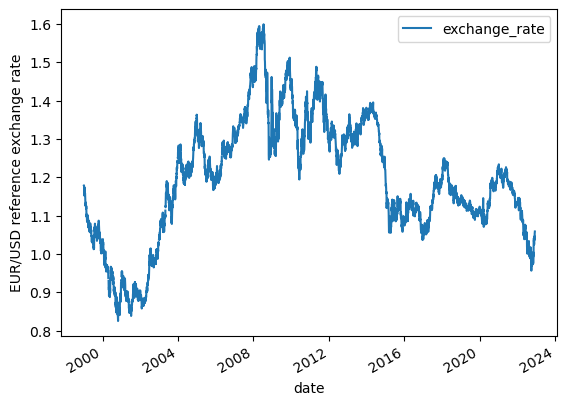

In [5]:
df.plot(kind="line", xlabel="date", ylabel="EUR/USD reference exchange rate")

And look at the summary statistics:

In [6]:
df.describe()

,exchange_rate
count,6129.000000
mean,1.193227
std,0.158707
min,0.825200
25%,1.094600
50%,1.188400
75%,1.311700
max,1.599000


The data does not seem to have obvious outliers or mistakes, but there are 62 missing data.

In [7]:
df.isna().sum()

exchange_rate      62
contents         4362
dtype: int64

## 3.	Handle missing observations

Fill in the exchange rate with the latest information available.
There is no more missing data for exchange rate.

In [8]:
df.exchange_rate.fillna(method='bfill', inplace=True)
df.isna().sum()

exchange_rate       0
contents         4362
dtype: int64


## 4. Calculate the exchange rate return

Get the return by using the formula: $R_{t} = \frac{P_{t}-P_{t-1}}{P_{t-1}}$

In [9]:
df['return'] = df.exchange_rate.diff(-1)/df.exchange_rate

Extend the original dataset with the variables "good_news" and "bad_news":

In [10]:
df['good_news'] = (df['return'] > 0.5/100).astype(int)
df['bad_news'] = (df['return'] < -0.5/100).astype(int)

In [11]:
df

,exchange_rate,contents,return,good_news,bad_news
date,,,,,
2022-12-05,1.0587,NaN,0.004628,0,0
2022-12-02,1.0538,NaN,0.007971,1,0
2022-12-01,1.0454,NaN,0.007461,1,0
2022-11-30,1.0376,NaN,0.000964,0,0
2022-11-29,1.0366,NaN,-0.009358,0,1
...,...,...,...,...,...
1999-01-08,1.1659,NaN,0.002316,0,0
1999-01-07,1.1632,NaN,-0.009543,0,1
1999-01-06,1.1743,NaN,-0.004002,0,0


## 5. Remove the entries for which contents is NA

In [12]:
df.dropna(inplace=True)
df

,exchange_rate,contents,return,good_news,bad_news
date,,,,,
2022-11-28,1.0463,SPEECH Hearing of the Committee on Economic...,0.008411,1,0
2022-11-24,1.0413,SPEECH Finding the right mix: monetary-fis...,0.008451,1,0
2022-11-18,1.0366,SPEECH Monetary policy in a new environment...,0.004534,0,0
2022-11-16,1.0412,SPEECH Greener and cheaper: could the tr...,0.000768,0,0
2022-11-15,1.0404,SPEECH Maintaining prudence when navigating...,0.008170,1,0
...,...,...,...,...,...
1999-01-28,1.1410,The euro - four weeks after the start Prof...,-0.010429,0,1
1999-01-25,1.1584,Finnish savers and investors in the euro are...,0.001468,0,0
1999-01-18,1.1612,Hearing at the European Parliament's Sub-Com...,-0.001206,0,0


## 5a/b. Generate and store `good_indicators` and `bad_indicators`

Load in some stop words, which are words that used to form a sentence but does not add much meaning to a sentence. Example of stop words are "a", "the" "does", "i", etc. 

In [22]:
#conda install nltk
#nltk.download('stopwords')

import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

The function below get the most common words (excluding stop_words) related to `good_news` and `bad_news`:

In [24]:
import string
import collections

def get_word_freq(contents, stop_words, num_words):
    freq = dict()
    for word in contents.split():
        word = word.strip(string.punctuation+'–')
        word = word.lower()
        if word not in stop_words and len(word):
            if word in freq:
                freq[word] += 1
            else:
                freq[word] = 1
    freq = dict(sorted(freq.items(), key = lambda item: -item[1]))
    return list(freq.keys())[:num_words]

Use the function above to get the 20 most common words associated with `good_news` and `bad_news`

In [25]:
# get the contents related to "good_news" and "bad_news"
good_news_contents = df.contents[df.good_news==1].str.cat(sep=' ')
bad_news_contents = df.contents[df.bad_news==1].str.cat(sep=' ')

good_indicators = get_word_freq(good_news_contents, stop_words, num_words = 20)
bad_indicators = get_word_freq(bad_news_contents, stop_words, num_words = 20)

In [26]:
good_indicators

['euro',
 'financial',
 'policy',
 'monetary',
 'area',
 'de',
 'economic',
 'market',
 'central',
 'also',
 'stability',
 'ecb',
 'inflation',
 'banks',
 'european',
 'der',
 'die',
 'price',
 'would',
 'growth']

In [27]:
bad_indicators

['euro',
 'financial',
 'policy',
 'monetary',
 'area',
 'market',
 'de',
 'central',
 'economic',
 'banks',
 'also',
 'stability',
 'european',
 'would',
 'ecb',
 'growth',
 'price',
 'inflation',
 'bank',
 'la']

Note that many terms appear in both, and the results are not the same as R. It may because the `word_tokenizer()` in R may not work the same way as `split()` with `strip()`.